In [ ]:
%rm -rf datasets
%rm -rf runs

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install and import YOLO
https://arxiv.org/pdf/2002.12467.pdf

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.4/78.2 GB disk)


In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.4/78.2 GB disk)


Check if using GPU mode.

Download YOLOv8 Model

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

model = YOLO(f'{HOME}/yolov8n.pt')


100%|██████████| 6.23M/6.23M [00:00<00:00, 83.8MB/s]


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

### INSERT ROBOFLOW SEGCK IMAGES BELOW
# REMOVE API KEY
!pip install roboflow

from roboflow import Roboflow
########################
### REMOVED API KEY ####
########################

project = rf.workspace("csc478").project("airplane-object-detection-segck")
version = project.version(2)
dataset = version.download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Airplane-Object-Detection-SEGCK-2 in yolov8:: 100%|██████████| 9650/9650 [00:01<00:00, 5400.62it/s]


Train with SegCK Images

In [ ]:
%cd {HOME}
# print(dataset.location)
# %ls ../../content/datasets/Airplane-Object-Detection-SEGCK-1
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True


/content
100% 21.5M/21.5M [00:00<00:00, 165MB/s]
New https://pypi.org/project/ultralytics/8.1.43 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Airplane-Object-Detection-SEGCK-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid

/content


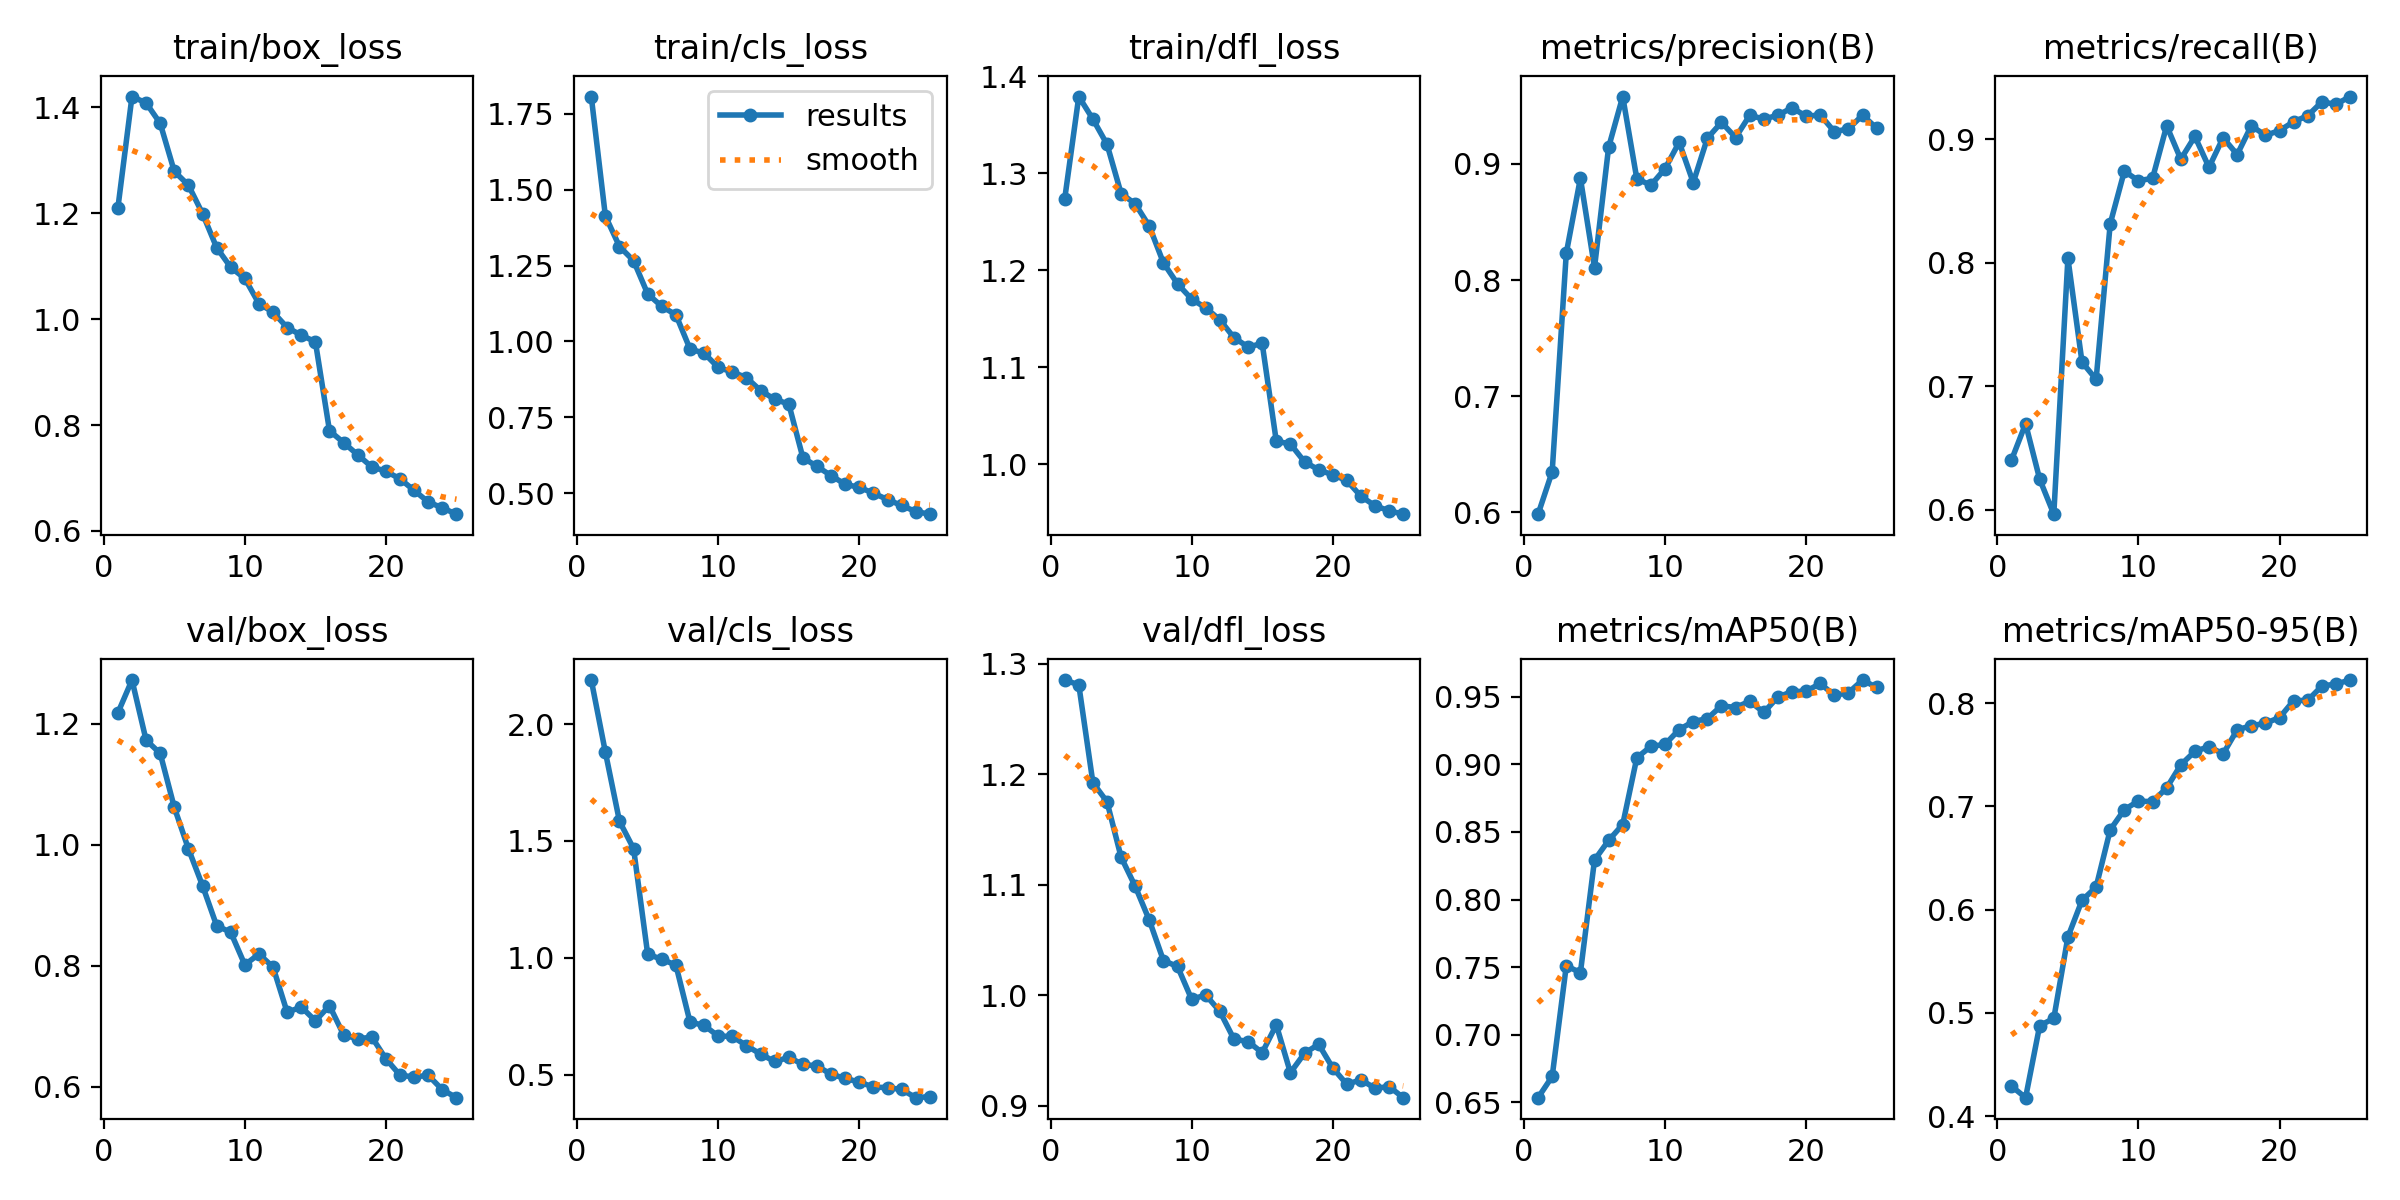

In [ ]:
# %cd datasets

# # REMOVE API KEY
# # project = rf.workspace("csc478").project("object-detection-99abe")
# # version = project.version(1)
# # dataset_diff = version.download("yolov8")
# ### INSERT ROBOFLOW DIFFUSION IMAGES BELOW

### Display Results
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
# %cd ../

# !yolo task=detect mode=train model=yolov8s.pt data={dataset_diff.location}/data.yaml epochs=25 imgsz=640 plots=True


Validate the model with validation set

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Airplane-Object-Detection-SEGCK-2/valid/labels.cache... 479 images, 0 backgrounds, 0 corrupt: 100% 479/479 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 30/30 [00:09<00:00,  3.17it/s]
                   all        479        517      0.931      0.935      0.957      0.824
Speed: 1.1ms preprocess, 9.5ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


Run with testing Images

In [ ]:
!yolo task=detect \
mode=predict \
model={HOME}/best.pt \
conf=0.8 \
source={dataset.location}/test/images

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/500 /content/datasets/Airplane-Object-Detection-SEGCK-2/test/images/f6c86424163c7cafa6d1f5bd9ffe634e_jpg.rf.4f0b3e58b915acebefacf10b509be464.jpg: 640x640 3 Airplanes, 17.3ms
image 2/500 /content/datasets/Airplane-Object-Detection-SEGCK-2/test/images/f6cb0caa6dbba5008866b84fbf4ef66a_jpg.rf.0b12d3e96a1f5e3bf0cf85eded8eff51.jpg: 640x640 2 Airplanes, 16.5ms
image 3/500 /content/datasets/Airplane-Object-Detection-SEGCK-2/test/images/f6d55e2d3b3f1a6be0554dd47c0f1b9f_jpg.rf.f9764c40a3ff180c4d2ff951038118aa.jpg: 640x640 1 Airplane, 16.3ms
image 4/500 /content/datasets/Airplane-Object-Detection-SEGCK-2/test/images/f6dbde8b4efb205dd8ce3dee7f602b82_jpg.rf.5aaca775530f46f4b2beba159134ea1c.jpg: 640x640 3 Airplanes, 16.3ms
image 5/500 /content/datasets/Airplane-Object-Detection-SEGCK

Save to drive

In [ ]:
%ls

datasets/  drive/  runs/  yolov8n.pt  yolov8s.pt


In [ ]:
!cp -r "/runs" "/content/drive/MyDrive/CSC478 Results 1"